Agung Jiwandanu



In [7]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()

print('Found GPU at: {}'.format(device_name))

Found GPU at: 


In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from matplotlib.image import imread
from matplotlib import image as mpimg


import tensorflow
from keras.utils.layer_utils import count_params
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model


In [11]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


**Librari**

In [40]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import *
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
#Extract folder

import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r')
data.extractall()

zip_ref = zipfile.ZipFile("archive.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

**Data**

In [46]:
#re-size semua gambar
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train/'
valid_path = 'Dataset/Test/'
x = 'Dataset/Train/Parasite/C33P1thinF_IMG_20150619_114756a_cell_182.png'
y = 'Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png'

In [14]:
# Import library dan menambahkan preprocessing layer
# menginput ukuran layer

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [15]:
# train layer
for layer in mobilnet.layers:
    layer.trainable = False

In [16]:
# import folder train
import os
folders = os.listdir(train_path)

In [17]:
folders

['Uninfected', 'Parasite']

In [18]:
# input layers
x = Flatten()(mobilnet.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

# buat sebuah model objek
model = Model(inputs=mobilnet.input, outputs=prediction)

**Struktrur model**

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# optimasi akurasi dan model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Praproses data**

In [22]:
# input data image dari data set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# menghitung ukuran layer
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [24]:
training_set

In [25]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


**Konfigurasi Training**

In [26]:
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1)
# check point model (monitor='val_loss', mode='min', verbose=1, patience=10)

**Proses pembelajaran**

In [27]:
# mencocokan model
# jalankan epoch
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[mc]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
13/13 [==============================] - ETA: 0s - loss: 1.3898 - accuracy: 0.5481 
Epoch 00001: saving model to best_model.h5
13/13 [==============================] - 355s 28s/step - loss: 1.3898 - accuracy: 0.5481 - val_loss: 0.5717 - val_accuracy: 0.6940
Epoch 2/5
13/13 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.7188 
Epoch 00002: saving model to best_model.h5
13/13 [==============================] - 354s 28s/step - loss: 0.5816 - accuracy: 0.7188 - val_loss: 0.5292 - val_accuracy: 0.7239
Epoch 3/5
13/13 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.7668 
Epoch 00003: saving model to best_model.h5
13/13 [==============================] - 352s 28s/step - loss: 0.4659 - accuracy: 0.7668 - val_loss: 0.4896 - val_accuracy: 0.7612
Epoch 4/5
13/13 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8726 
Epoch 00004: saving model to best_model.h5
13/13 [==============================] - 352s 28s/step - lo

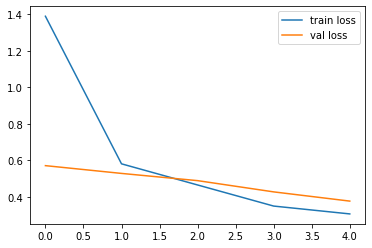

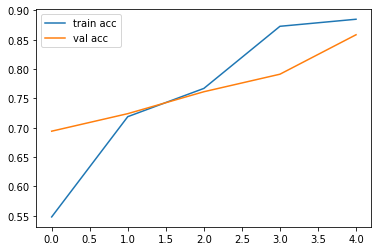

<Figure size 432x288 with 0 Axes>

In [28]:
# menginput loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# menginput accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

**Model evaluasi**

In [30]:
saved_model.evaluate(test_set)

5/5 [==============================] - 85s 16s/step - loss: 0.3775 - accuracy: 0.8582


[0.37750688195228577, 0.858208954334259]

In [31]:
def create():
    from tensorflow.keras.layers import MaxPooling2D
    ### Create Model from scratch using CNN
    model=Sequential()
    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dense(2,activation="softmax"))
    
    # tell the model what cost and optimization method to use
    model.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy']
    )

    return model

**Visualisasi hasil training**

In [32]:
scratch = create()
scratch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

**Model**

In [33]:
mc = ModelCheckpoint('scratch_model.h5', monitor='val_loss', mode='min', verbose=1)
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

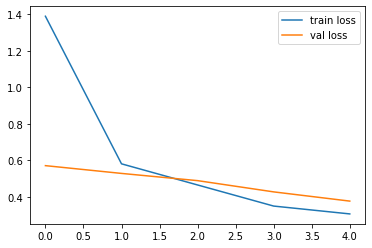

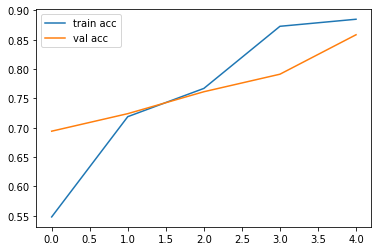

<Figure size 432x288 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Evaluasi model**

In [35]:
from keras.models import load_model

In [36]:
saved_model.evaluate(test_set)

5/5 [==============================] - 85s 16s/step - loss: 0.3775 - accuracy: 0.8582


[0.37750688195228577, 0.858208954334259]

**Menampilkan contoh citra sel yang terinfeksi malaria**

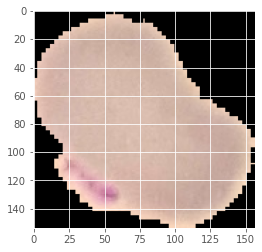

In [47]:
gambar = mpimg.imread(x)
plt.imshow(gambar)

**Menampilkan contoh citra sel yang tidak terinfeksi malaria (normal)**

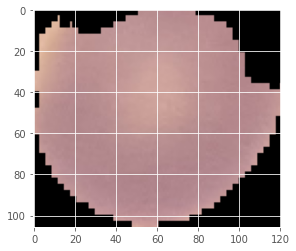

In [48]:
gambar1 = mpimg.imread(y)
plt.imshow(gambar1)

**Visualisasi hasil training**

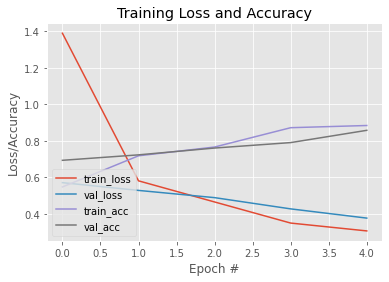

In [42]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 5), r.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), r.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), r.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

**Klasifikasi Data Testing**

In [43]:
predictions = model.predict(test_set)

Normal = tidak terinfeksi


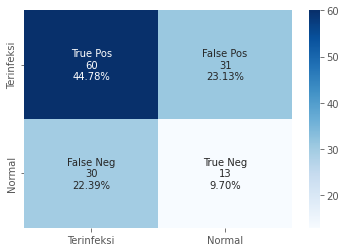

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_pred = np.argmax(predictions, axis=-1)
#y_pred = [1 * (x[0]>=0.5) for x in predictions]
cf_matrix = confusion_matrix(test_set.classes, y_pred)

group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ["Terinfeksi","Normal"]
sn.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=categories, yticklabels=categories, cmap='Blues')
print("Normal = tidak terinfeksi")